<a href="https://colab.research.google.com/github/ImranParthib13/traffic_prediction/blob/main/traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/traffic.csv")

In [ ]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data = data.drop(["ID"], axis=1)
data.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])

In [ ]:
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Date_no'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.strftime("%A")

data.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


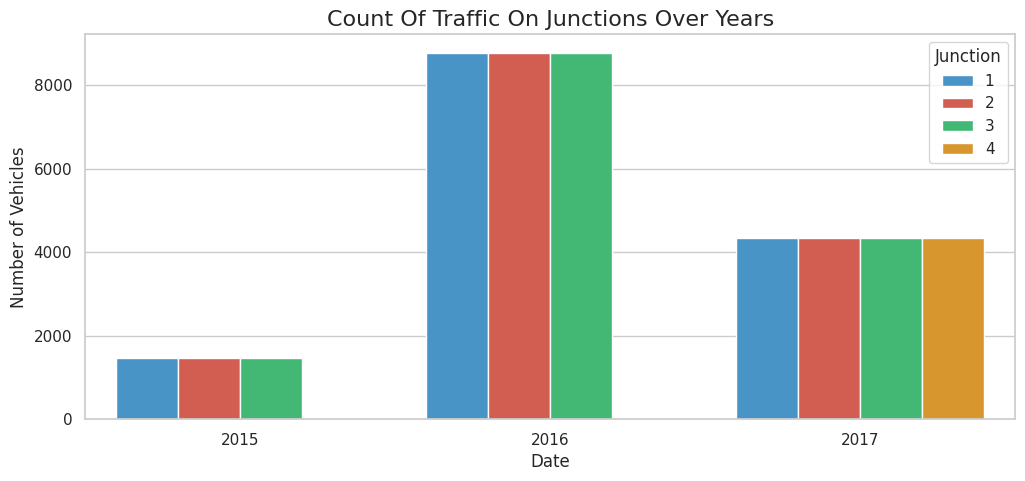

In [ ]:
sns.set(style="whitegrid")

colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]

plt.figure(figsize=(12, 5))

count = sns.countplot(data, x=data["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years", fontsize=16)
count.set_ylabel("Number of Vehicles", fontsize=12)
count.set_xlabel("Date", fontsize=12)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['Day_number'] = LabelEncoder().fit_transform(data.Day)
data.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day,Day_number
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday,3
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday,3
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday,3
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday,3
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday,3


<ipython-input-11-3fd5162d38ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


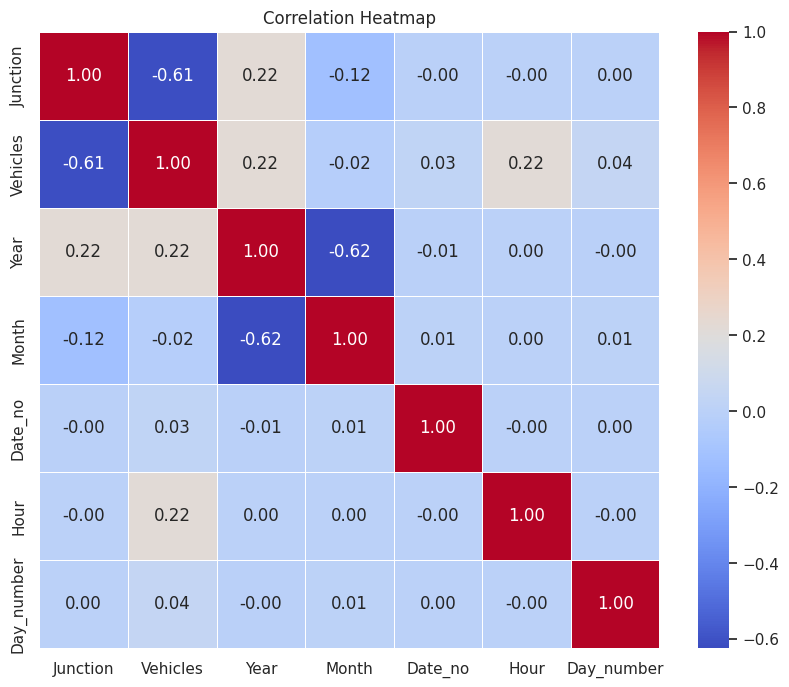

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x = data[['Year', 'Month', 'Date_no', 'Hour', 'Day_number']]
y = data['Vehicles']

In [ ]:
x

,Year,Month,Date_no,Hour,Day_number
0,2015,11,1,0,3
1,2015,11,1,1,3
2,2015,11,1,2,3
3,2015,11,1,3,3
4,2015,11,1,4,3
...,...,...,...,...,...
48115,2017,6,30,19,0
48116,2017,6,30,20,0
48117,2017,6,30,21,0
48118,2017,6,30,22,0


In [ ]:
y

0        15
1        13
2        10
3         7
4         9
         ..
48115    11
48116    30
48117    16
48118    22
48119    12
Name: Vehicles, Length: 48120, dtype: int64

In [ ]:
junctions = data["Junction"].unique()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

bin_width = 10
data['Vehicles Binned'] = pd.cut(data['Vehicles'], bins=np.arange(0, data['Vehicles'].max() + bin_width, bin_width), right=False)

mlp_params = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'max_iter': 200
}

classification_models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Support Vector Machine', SVC()),
    ('MLP', MLPClassifier(**mlp_params))
]


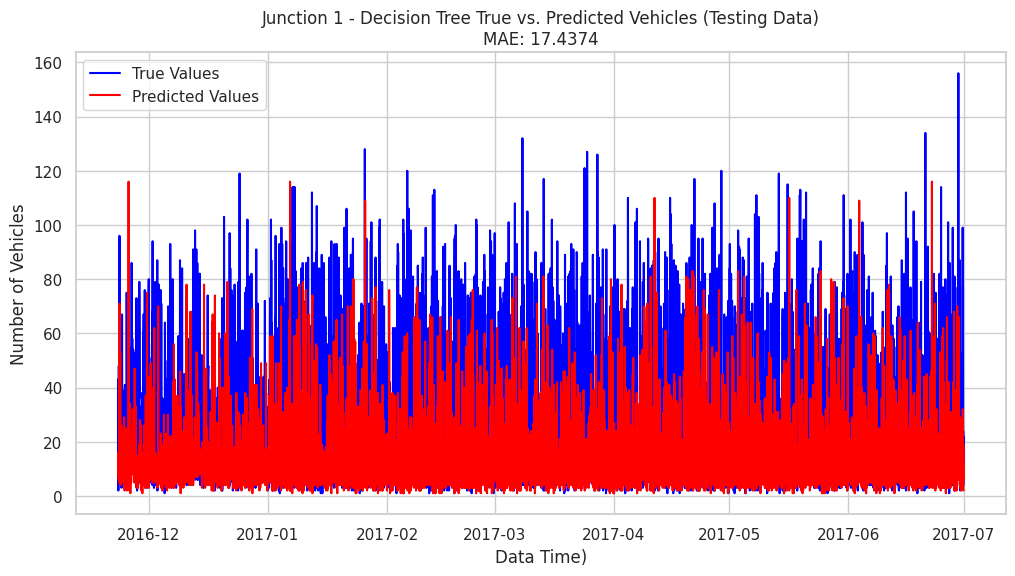

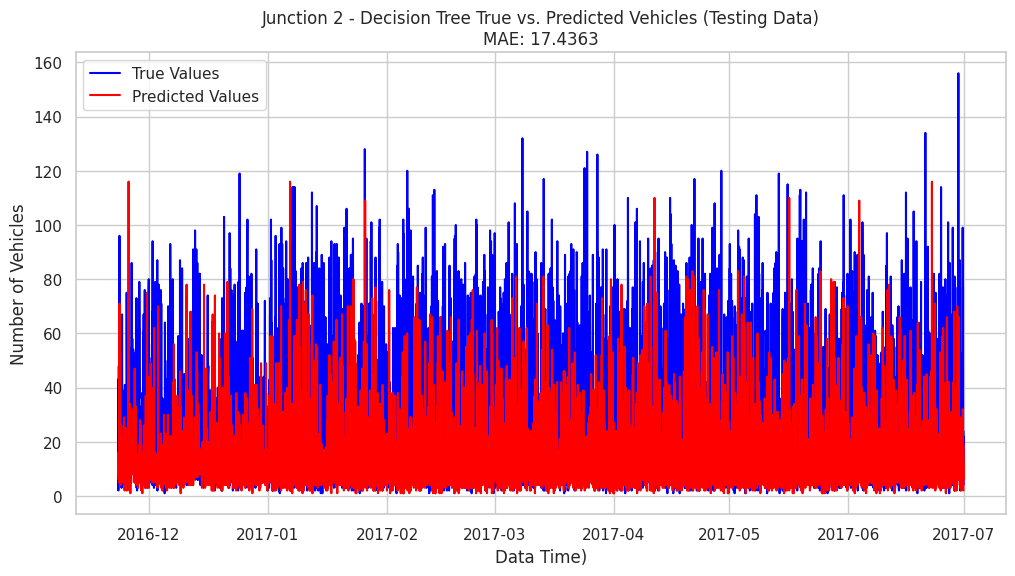

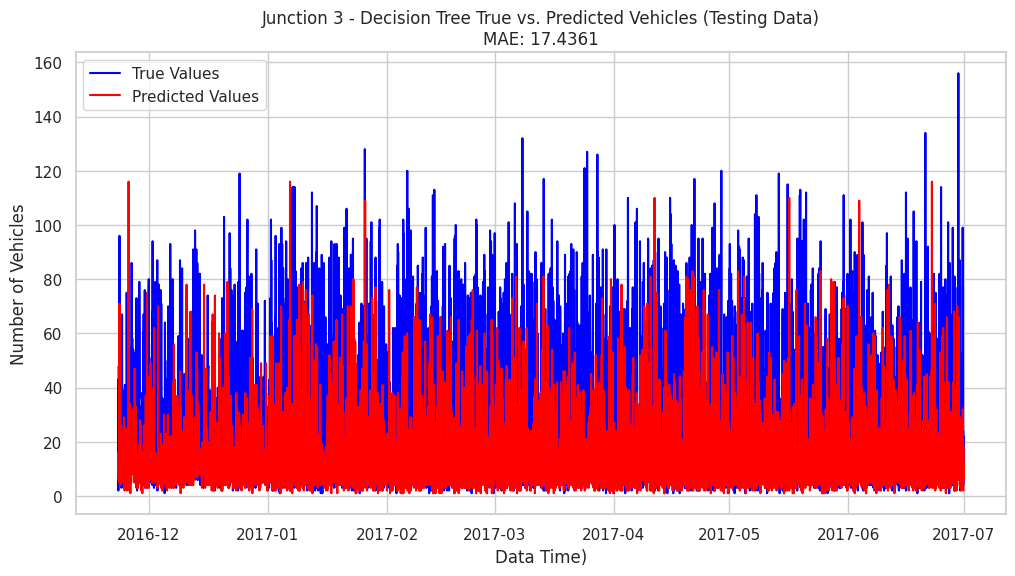

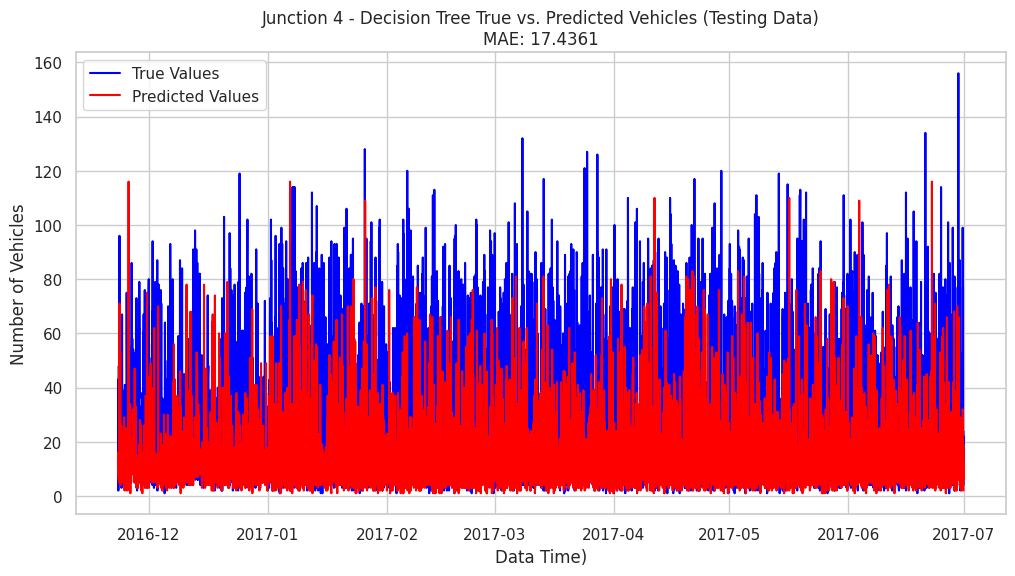

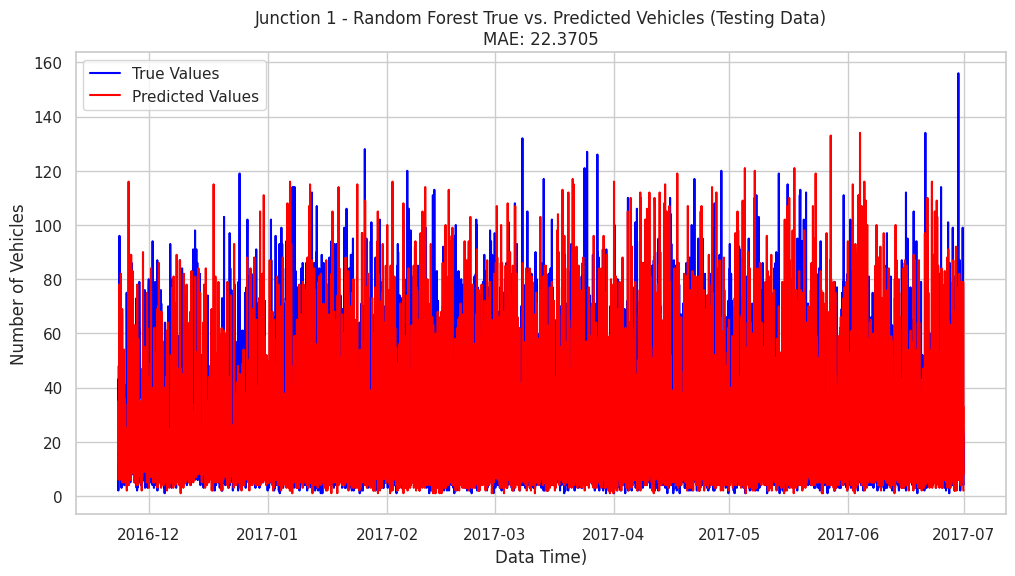

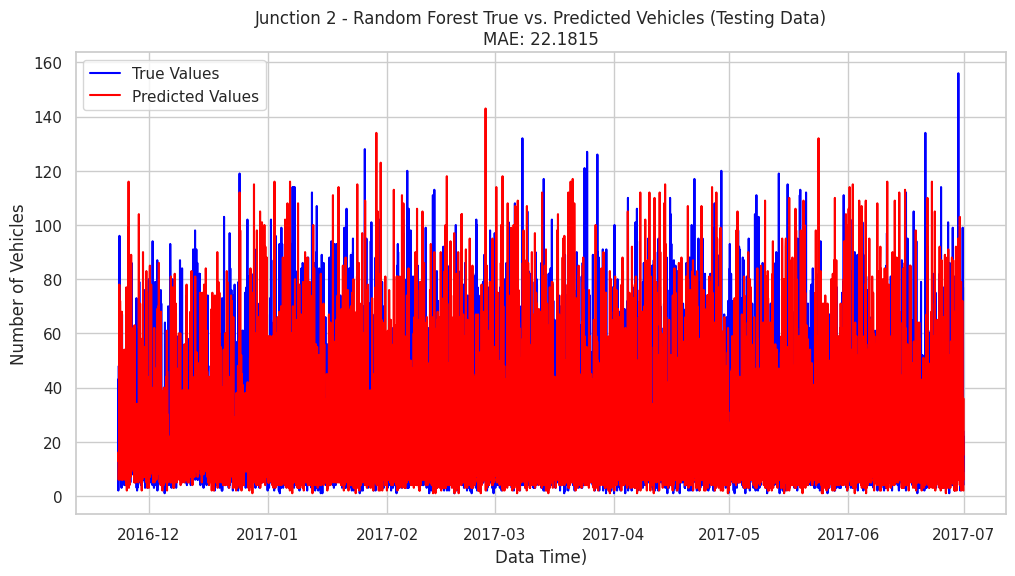

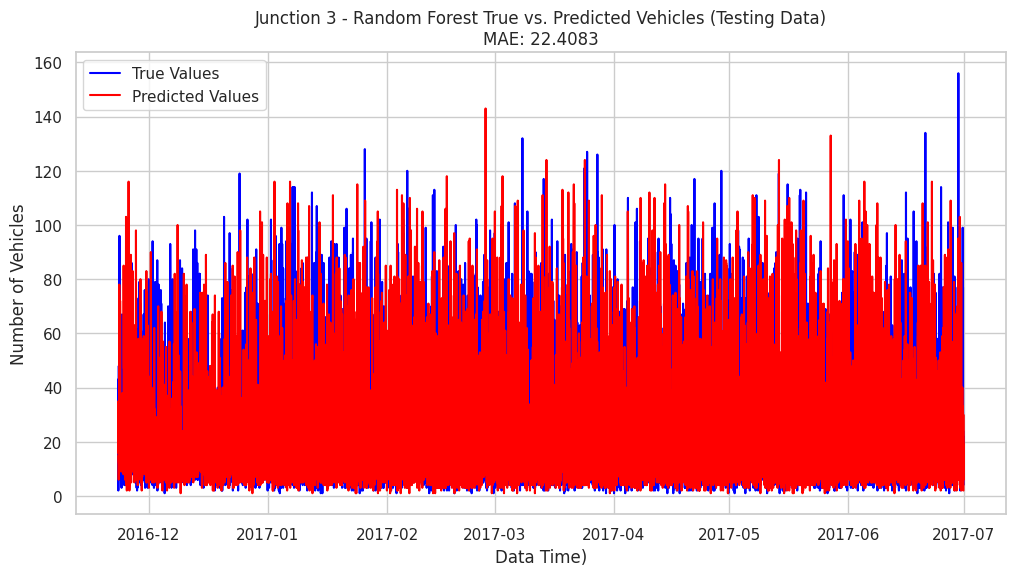

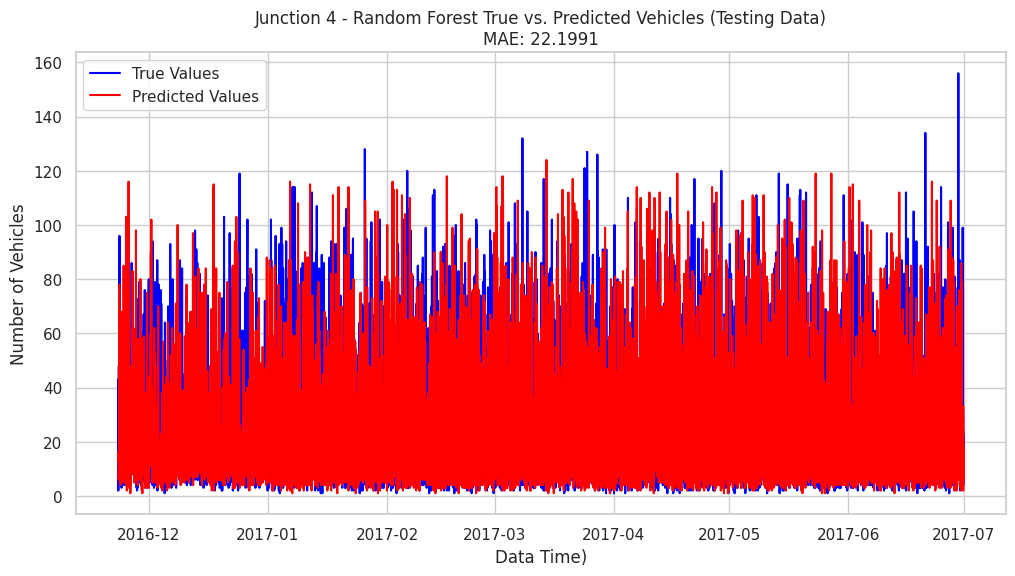

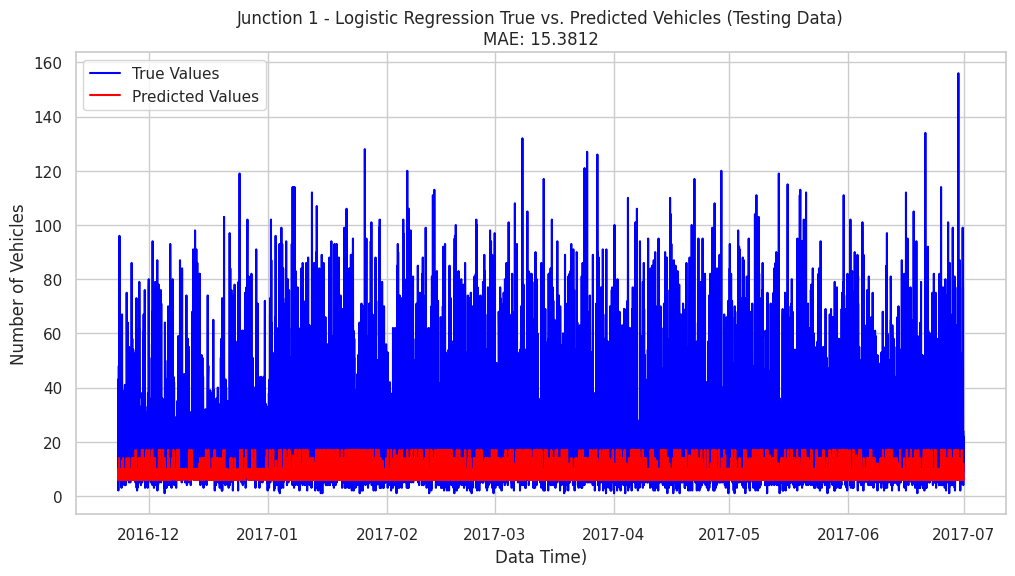

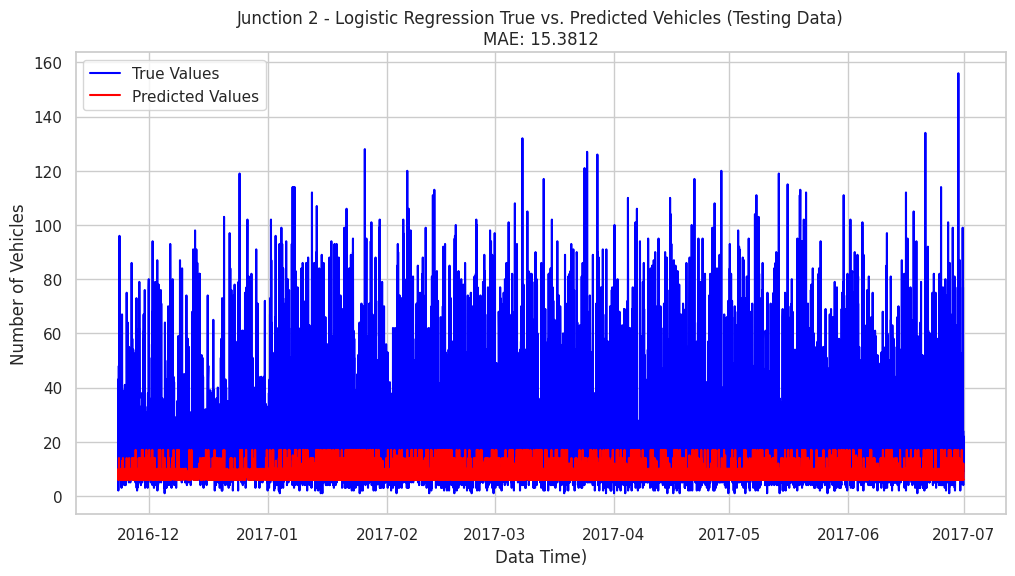

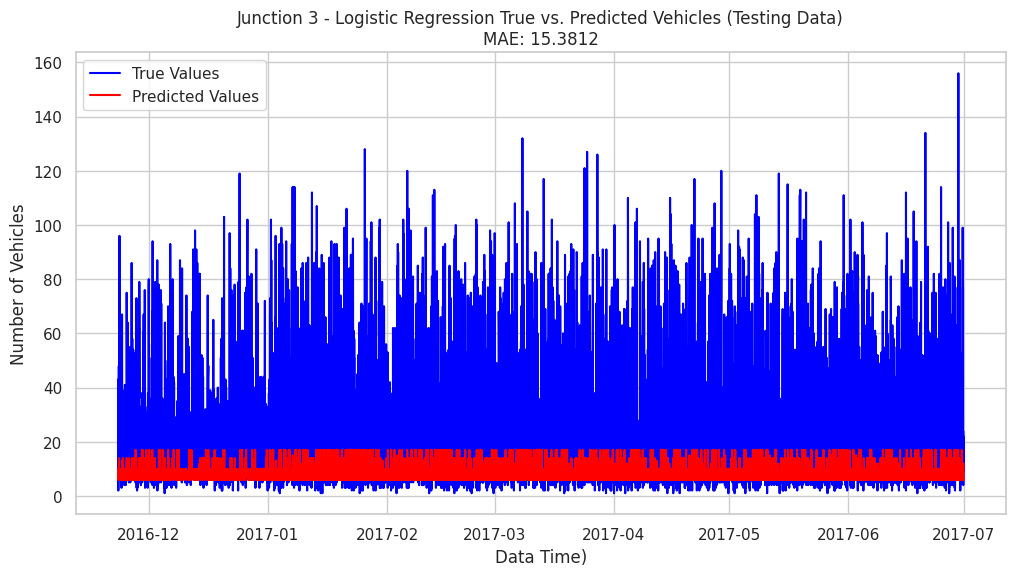

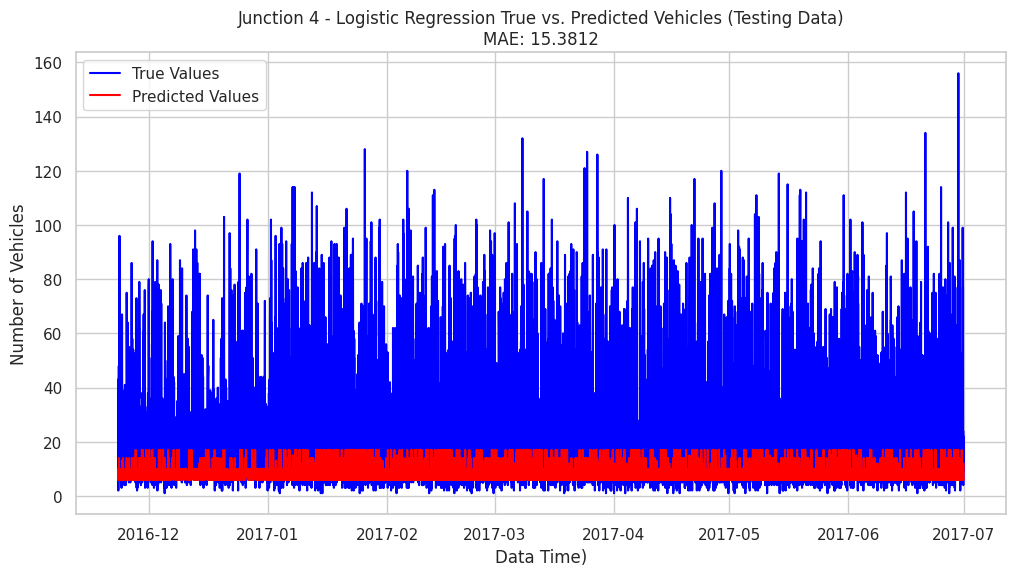

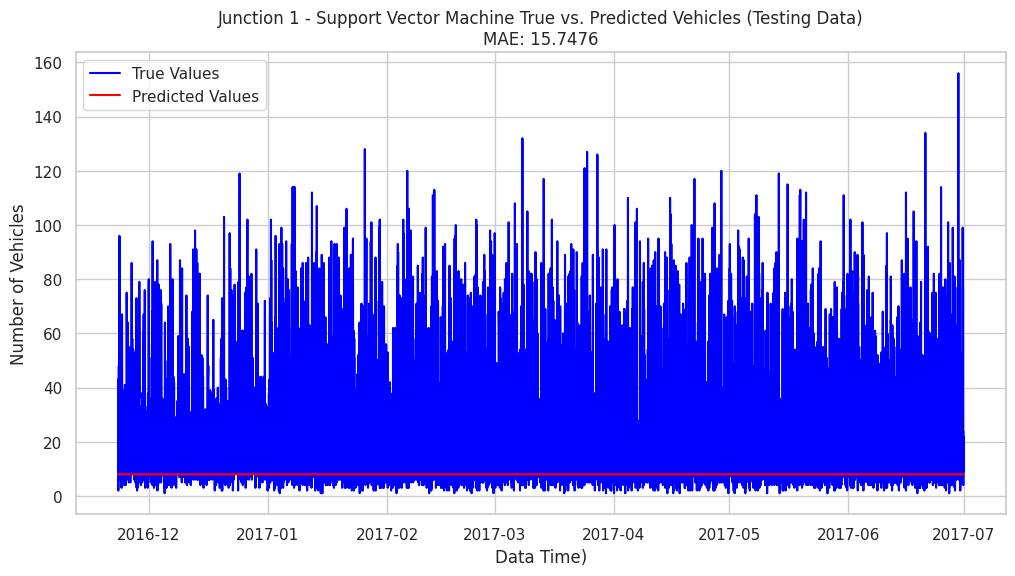

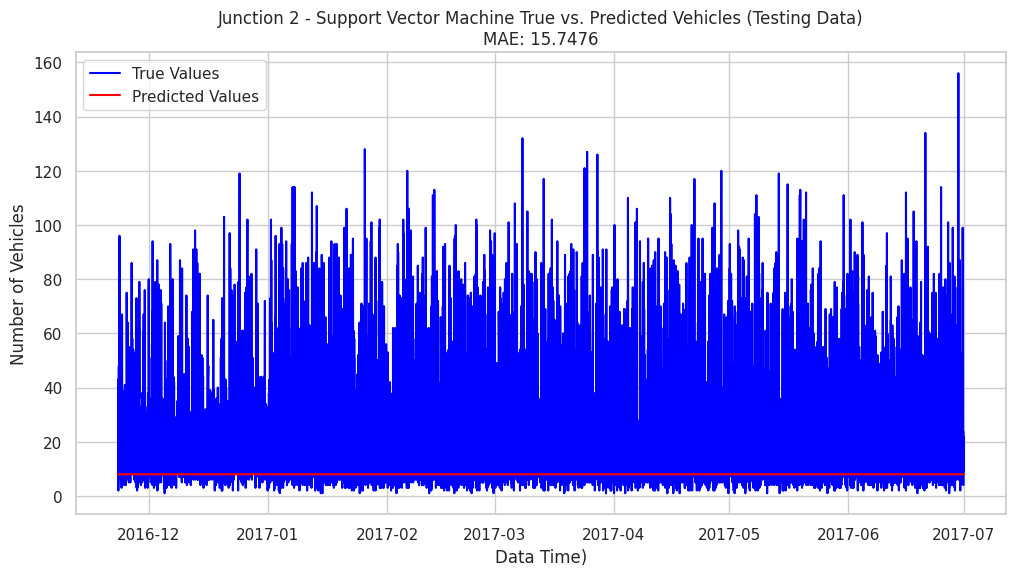

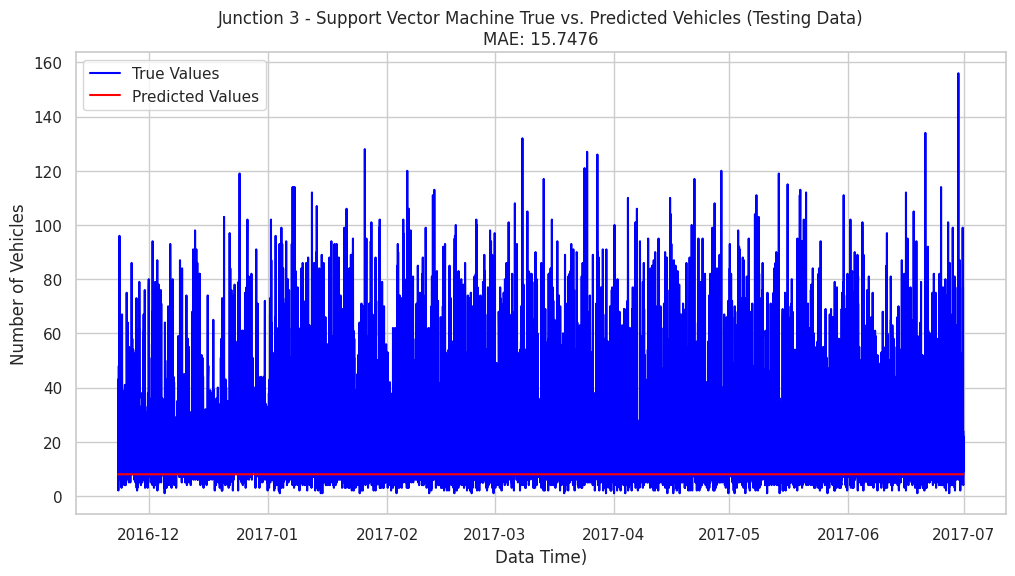

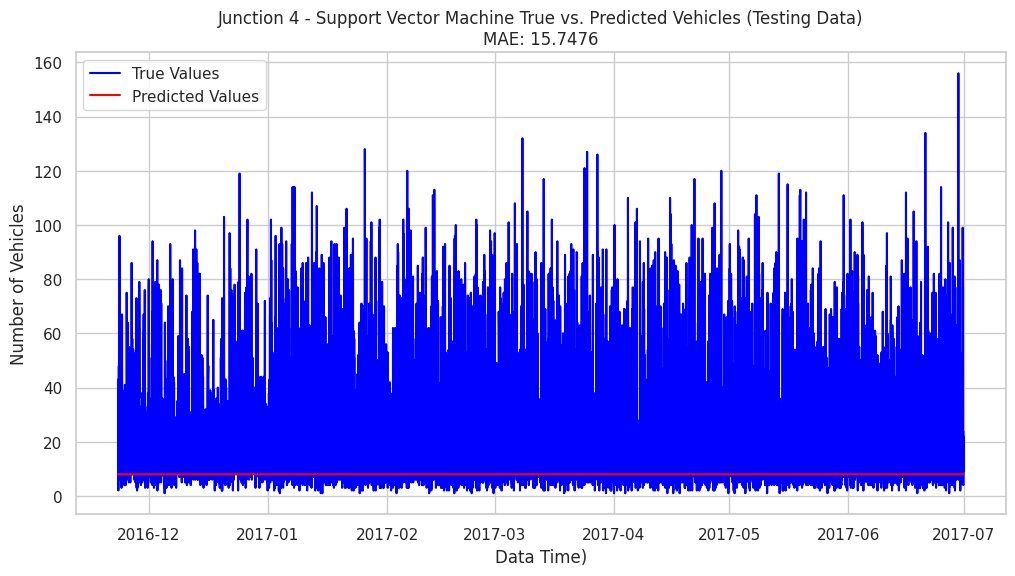

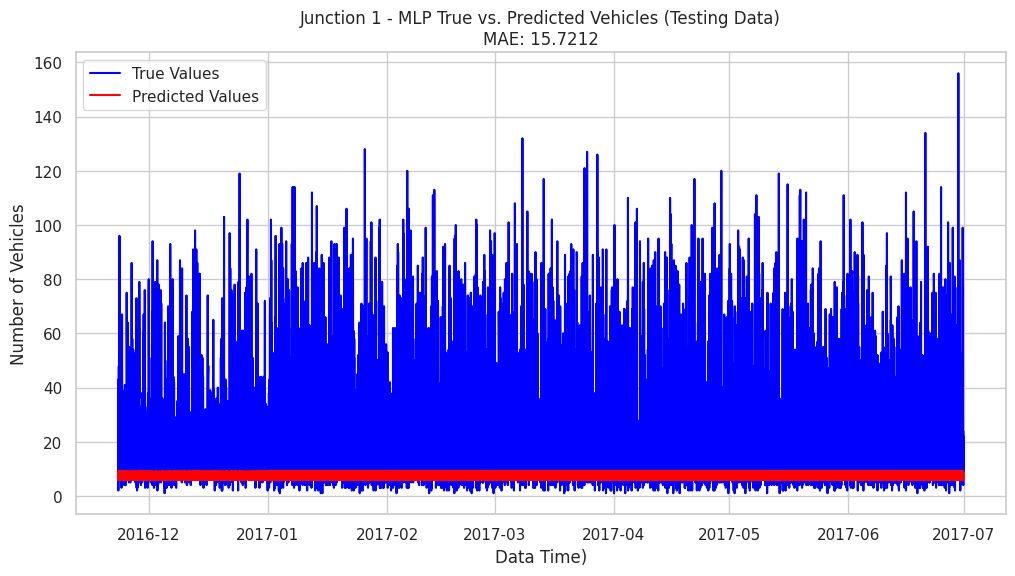

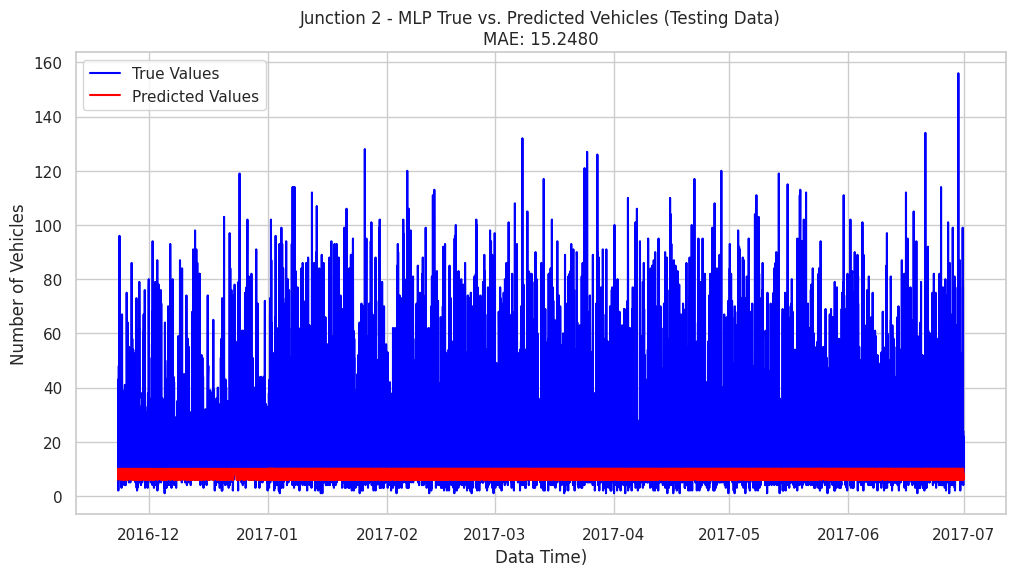

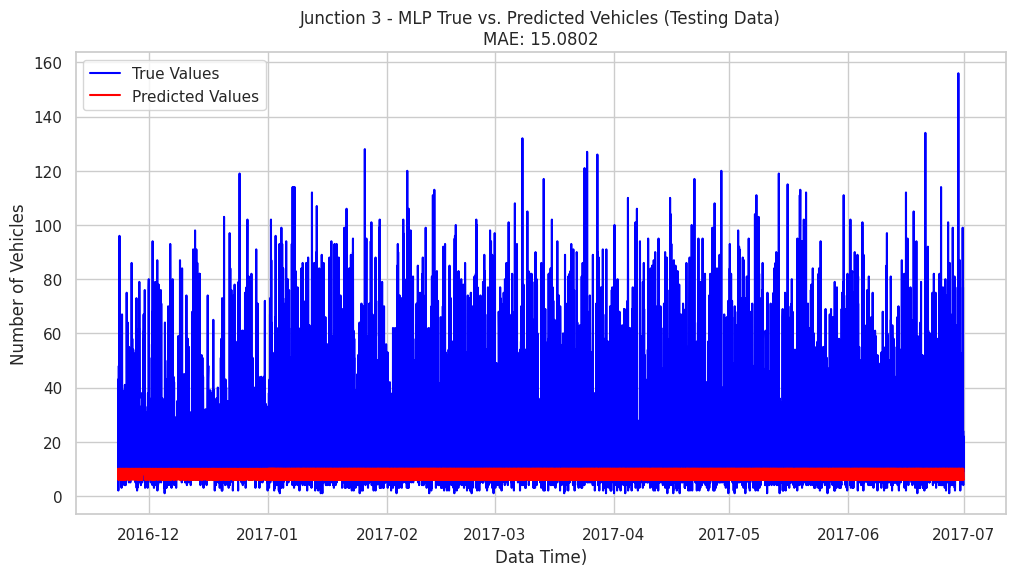

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


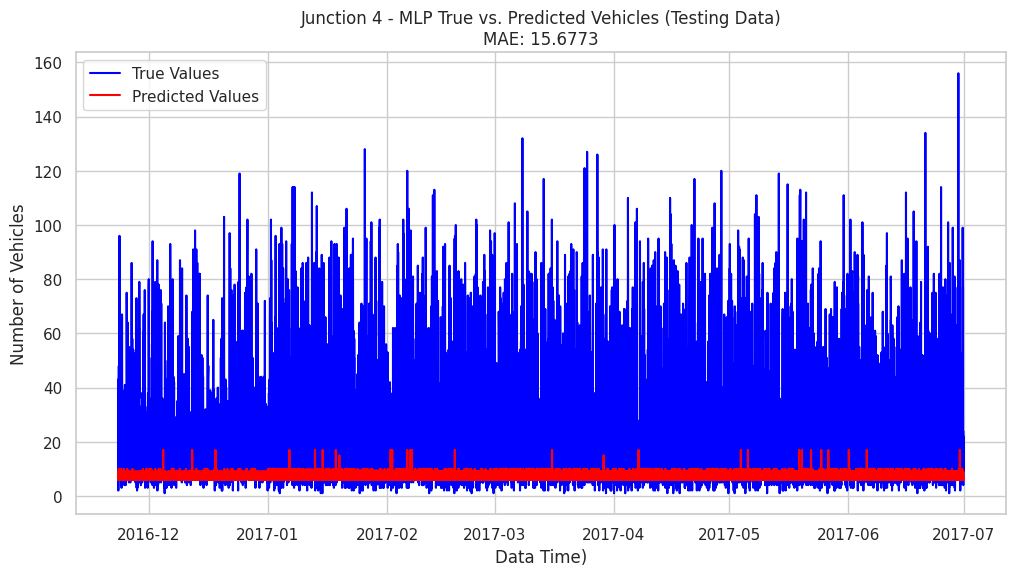

In [ ]:
mae_values = {}

for model_name, model in classification_models:
    mae_values[model_name] = []
    for junction in junctions:
        train_size = int(0.8 * len(data))
        train_data, test_data = data[:train_size], data[train_size:]
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=0.2)
        if model_name == 'MLP':
            model = MLPClassifier(**mlp_params)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        else:
            reg = model.fit(x_train, y_train)
            y_pred = reg.predict(x_test)

        mae = mean_absolute_error(y_test, y_pred)
        mae_values[model_name].append(mae)

        plt.figure(figsize=(12, 6))
        plt.plot(test_data['DateTime'], y_test, label='True Values', color='blue')
        plt.plot(test_data['DateTime'], y_pred, label='Predicted Values', color='red')
        plt.title(f'Junction {junction} - {model_name} True vs. Predicted Vehicles (Testing Data)\nMAE: {mae:.4f}')
        plt.xlabel('Data Time)')
        plt.ylabel('Number of Vehicles')
        plt.legend()
        plt.show()

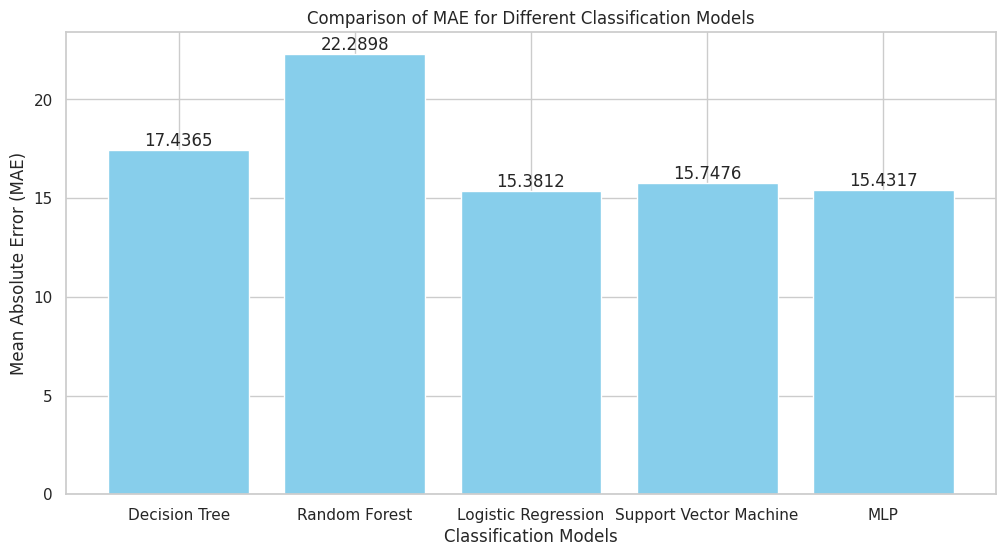

In [ ]:
plt.figure(figsize=(12, 6))
model_names = list(mae_values.keys())
mae_scores = [np.mean(values) for values in mae_values.values()]
plt.bar(model_names, mae_scores, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Classification Models')


for i, mae in enumerate(mae_scores):
    plt.text(i, mae, f'{mae:.4f}', ha='center', va='bottom')

plt.show()